In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTreeClassifier
from sklearn.datasets import load_iris, load_wine, load_breast_cancer

from DecisionTreeClassifier import DecisionTreeClassifier



### DecisionTreeClassifier

In [2]:
# Creating a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training and testing the custom DecisionTreeClassifier
dt_custom = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_custom.fit(X_train, y_train)
y_pred_custom = dt_custom.predict(X_test)
accuracy_custom = accuracy_score(y_test, y_pred_custom)

###  scikit-learn DecisionTreeClassifier

In [3]:
# Training and testing the scikit-learn DecisionTreeClassifier
dt_sklearn = SklearnDecisionTreeClassifier(max_depth=5, random_state=42)
dt_sklearn.fit(X_train, y_train)
y_pred_sklearn = dt_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)


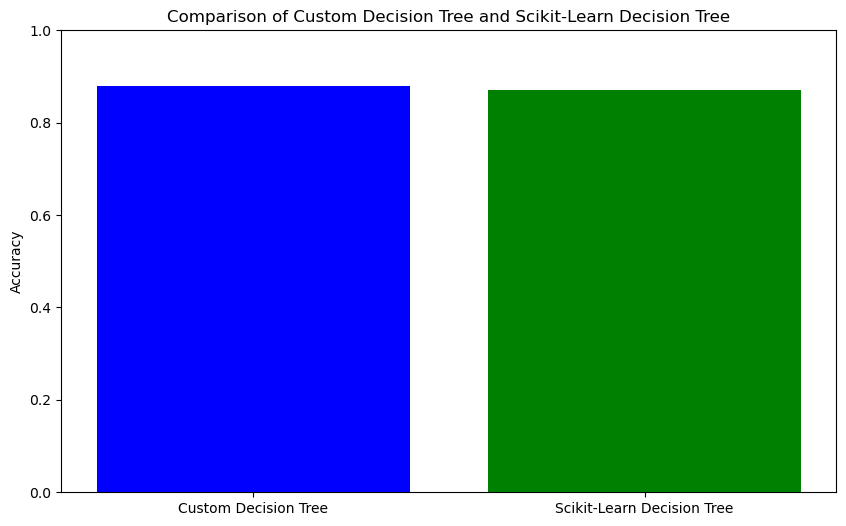

In [4]:
# Plotting the results
labels = ['Custom Decision Tree', 'Scikit-Learn Decision Tree']
accuracies = [accuracy_custom, accuracy_sklearn]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Custom Decision Tree and Scikit-Learn Decision Tree')
plt.ylim(0.0, 1.0)
plt.show()

In [10]:
# Load the datasets
iris_data = load_iris()
wine_data = load_wine()
breast_cancer_data = load_breast_cancer()

datasets = [
    ("Iris", iris_data.data, iris_data.target),
    ("Wine", wine_data.data, wine_data.target),
    ("Breast Cancer", breast_cancer_data.data, breast_cancer_data.target)
]

# Initialize models
models = {
    'Custom Decision Tree': DecisionTreeClassifier(max_depth=3),
    'Scikit-Learn Decision Tree': SklearnDecisionTreeClassifier(max_depth=3, random_state=42)
}


In [11]:
# Train and test models on each dataset
results = {}
for name, model in models.items():
    results[name] = []
    for dataset_name, X, y in datasets:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name].append(accuracy)


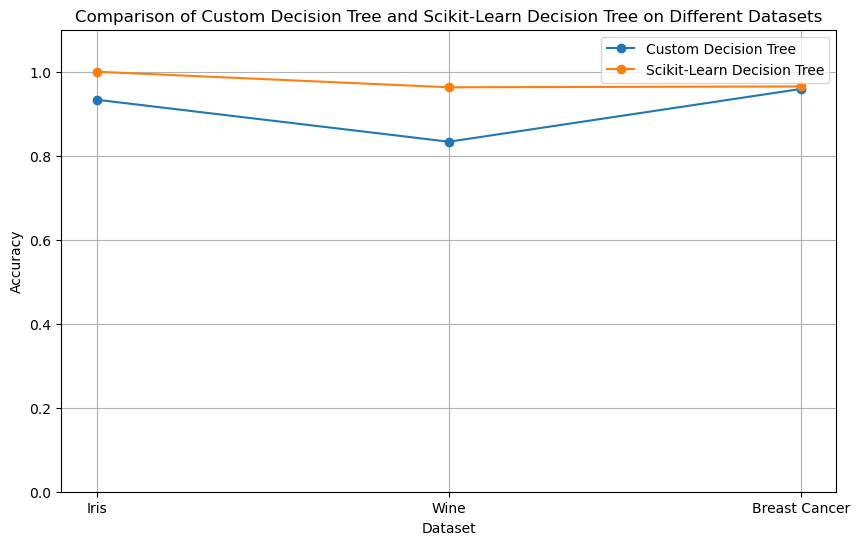

In [19]:
# Plotting the results
plt.figure(figsize=(10, 6))
for name, accuracies in results.items():
    plt.plot(range(1, len(datasets)+1), accuracies, label=name, marker='o')

plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of Custom Decision Tree and Scikit-Learn Decision Tree on Different Datasets')
plt.xticks(range(1, len(datasets)+1), [name for name, _, _ in datasets])
plt.ylim(0.0, 1.1)
plt.legend()
plt.grid(True)
plt.show()